In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
df = pd.read_csv('survey_response_data.csv')
df1 = df[['id','clients', 'suppliers', 'banks','investors', 'lawyers', 'politicians', 'govoff']]
df2 = df1.groupby(['id']).sum()  ##aggregate data
column_headers = list(df2.columns.values)
df2.head()


,clients,suppliers,banks,investors,lawyers,politicians,govoff
id,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,12.0,0.0,0.0,0.0,0.0,0.0
3,0.0,8.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,6.0


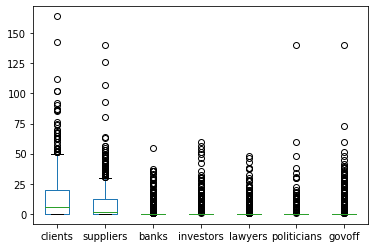

In [ ]:
##draw box plot
fig = plt.figure();
df2.boxplot(column=['clients', 'suppliers', 'banks','investors', 'lawyers', 'politicians', 'govoff'], grid = False, figsize=(14,5))
fig.savefig('boxplot.png',format ='png',dpi =500,bbox_inches='tight')

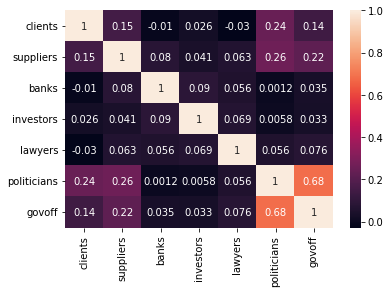

In [ ]:
##draw heatmap
fig = plt.figure();
dataplot = sns.heatmap(df2.corr(), annot=True)
fig.savefig('heatmap.png',format ='png',dpi =500,bbox_inches='tight')

    clients  suppliers     banks  investors   lawyers  politicians    govoff
0  0.954427   0.252229  0.002412   0.012944 -0.003004     0.109287  0.115430
1 -0.284836   0.924112  0.043270   0.021176  0.038721     0.131051  0.209502
2 -0.079004  -0.281308 -0.001767   0.011690  0.047748     0.448577  0.843198
3  0.002998  -0.034763  0.340804   0.922020  0.172476    -0.052321 -0.005317
4  0.014502  -0.032689  0.919806  -0.367240  0.129355    -0.032053  0.007199
5  0.015701  -0.011644 -0.184065  -0.115831  0.974541    -0.013990 -0.048936
6 -0.035082  -0.029155  0.045252   0.029046  0.000731     0.875043 -0.478882
[0.48063181 0.25137937 0.11362934 0.05646524 0.04252094 0.03621477
 0.01915853]


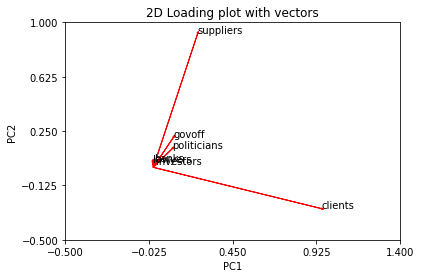

In [ ]:
##PCA
pca = PCA(n_components=7)
newX = pca.fit_transform(df2)


##find the first principal component
comp = pca.components_
coef_df = pd.DataFrame(data=comp)
for i in range(7):
  coef_df.rename(columns = { i :column_headers[i]}, inplace = True)
print(coef_df)

##explained variance ratio
var = pca.explained_variance_ratio_
print(var)
print(pca.explained_variance_ratio_.cumsum())

##draw loading 
xs = comp[0]
ys = comp[1]
fig = plt.figure();
# Plot the loadings on a scatterplot
for i, varnames in enumerate(column_headers):
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.5, 1.4, num=5)
yticks = np.linspace(-0.5, 1, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()
fig.savefig('2Dloading.png',format ='png',dpi =500,bbox_inches='tight')